In [1]:
import numpy as np
from smt.surrogate_models import KRG
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [83]:
xtrain = np.linspace(0, 1, 4)
ytrain = (6*xtrain-2)**2 * np.sin(12*xtrain-4) # forrester

In [88]:
# corr = 'squar_exp'
corr = 'matern52'
sm = KRG(theta0=[1e-2], corr=corr, theta_bounds=[1e-6, 1], print_global=False)
sm.set_training_values(xtrain, ytrain)
sm.train()

print(sm.optimal_theta)

[1.]


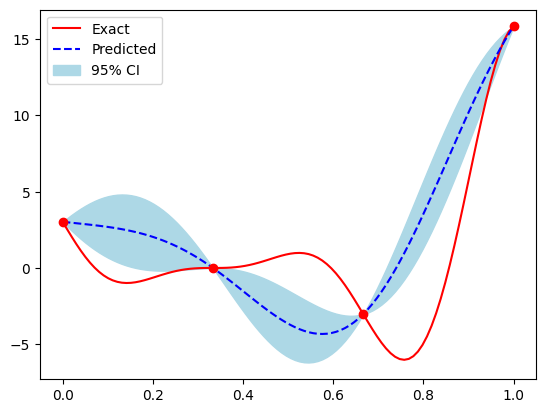

In [89]:
xplot = np.linspace(0, 1, 100)
yplot = (6*xplot-2)**2 * np.sin(12*xplot-4) # forrester
yplot_pred = sm.predict_values(xplot).reshape(-1,)
yplot_var = sm.predict_variances(xplot).reshape(-1,)

fig, ax = plt.subplots()
ax.plot(xplot, yplot, 'r-', label='Exact')
ax.plot(xplot, yplot_pred, 'b--', label='Predicted')
ax.fill_between(xplot, yplot_pred - np.sqrt(yplot_var), yplot_pred + np.sqrt(yplot_var), color='lightblue', label='95% CI')
ax.plot(xtrain, ytrain, 'ro')
ax.legend()